In [1]:
import netCDF4 as nc
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [2]:
bath=nc.Dataset('/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy0=bath.variables['Bathymetry'][:]
nav_lon=bath.variables['nav_lon'][:]#[::10,::10]
nav_lat=bath.variables['nav_lat'][:]#[::10,::10]
bathy=bathy0[:]#[::10,::10]

U_filename3=sorted(glob.glob('yearly/*gridU*2002*.nc'))
#print("found *.nc file: \n{}".format(U_filename))
V_filename3=sorted(glob.glob('yearly/*gridV*2002*.nc'))
W_filename3=sorted(glob.glob('yearly/*gridW*2002*.nc'))

In [3]:
def ufield(n):
    U=nc.Dataset(U_filename[n])
    U=U.variables['vozocrtx'][0,layer,:,:]
    U=np.ma.masked_where(abs(U)<= 0, U)
    U=np.ma.masked_where(np.isnan(U),U)
    return U#[0,layer,::10,::10]
def vfield(n):
    V=nc.Dataset(V_filename[n])
    V=V.variables['vomecrty'][0,layer,:,:]
    V=np.ma.masked_where(abs(V)<= 0, V)
    V=np.ma.masked_where(np.isnan(V),V)
    return V

def wfield(n):
    W=nc.Dataset(W_filename[n])
    return W.variables['vovecrtz'][0,layer,:,:]#[0,layer,::10,::10]

def ufield2(n):
    U2=nc.Dataset(U_filename2[n])
    return U2.variables['vozocrtx'][0,layer,:,:]#[0,layer,::10,::10]
def vfield2(n):
    V2=nc.Dataset(V_filename2[n])
    return V2.variables['vomecrty'][0,layer,:,:]#[0,layer,::10,::10]
def wfield2(n):
    W2=nc.Dataset(W_filename2[n])
    return W2.variables['vovecrtz'][0,layer,:,:]#[0,layer,::10,::10]

def ufield3(n):
    U3=nc.Dataset(U_filename3[n])
    return U3.variables['vozocrtx'][0,layer,:,:]#[0,layer,::10,::10]
def vfield3(n):
    V3=nc.Dataset(V_filename3[n])
    return V3.variables['vomecrty'][0,layer,:,:]#[0,layer,::10,::10]
def wfield3(n):
    W3=nc.Dataset(W_filename3[n])
    return W3.variables['vovecrtz'][0,layer,:,:]#[0,layer,::10,::10]

def date(n):
    V=nc.Dataset(V_filename[n])
    return V_filename[n][18:24]
def depth(n):
    U=nc.Dataset(U_filename[n])
    return U.variables['depthu'][:]

# 1. Velocity profile in Canada Basin 

In [4]:
U_filename=sorted(glob.glob('yearly/*gridU*.nc'))
ice_filename=sorted(glob.glob('yearly/*T*.nc'))
print("found *.nc file: \n{}".format(ice_filename))

found *.nc file: 
['yearly/ANHA4-EXH001_gridT_y2002.nc', 'yearly/ANHA4-EXH001_gridT_y2006.nc', 'yearly/ANHA4-EXH001_gridT_y2010.nc']


In [5]:
def vel_ver(n,a,aloc):
    if aloc =='1':
        U=nc.Dataset(U_filename[n])
        U=U.variables['vozocrtx'][0,:,a,:]
        U=np.ma.masked_where(abs(U)<= 0, U)
        U=np.ma.masked_where(np.isnan(U),U)

        V=nc.Dataset(V_filename[n])
        V=V.variables['vomecrty'][0,:,a,:]
        V=np.ma.masked_where(abs(V)<= 0, V)
        V=np.ma.masked_where(np.isnan(V),V)

        W=nc.Dataset(W_filename[n])
        W=W.variables['vovecrtz'][0,:,a,:]
    else:
        U=nc.Dataset(U_filename[n])
        U=U.variables['vozocrtx'][0,:,:,a]
        U=np.ma.masked_where(abs(U)<= 0, U)
        U=np.ma.masked_where(np.isnan(U),U)

        V=nc.Dataset(V_filename[n])
        V=V.variables['vomecrty'][0,:,:,a]
        V=np.ma.masked_where(abs(V)<= 0, V)
        V=np.ma.masked_where(np.isnan(V),V)

        W=nc.Dataset(W_filename[n])
        W=W.variables['vovecrtz'][0,:,:,a]
    return U,V,W

def ST_ver(n,a,aloc):
    if aloc =='1':
        ice=nc.Dataset(ice_filename[n])
        S=ice.variables['vosaline'][0,:,a,:]
        S=np.ma.masked_where(abs(S)<= 0, S)
        S=np.ma.masked_where(np.isnan(S),S)
        
        T=ice.variables['votemper'][0,:,a,:]
        T=np.ma.masked_where(abs(T)<= 0, T)
        T=np.ma.masked_where(np.isnan(T),T)

    else:
        ice=nc.Dataset(ice_filename[n])
        S=ice.variables['vosaline'][0,:,:,a]
        S=np.ma.masked_where(abs(S)<= 0, S)
        S=np.ma.masked_where(np.isnan(S),S)
        
        T=ice.variables['votemper'][0,:,:,a]
        T=np.ma.masked_where(abs(T)<= 0, T)
        T=np.ma.masked_where(np.isnan(T),T)


    return S,T

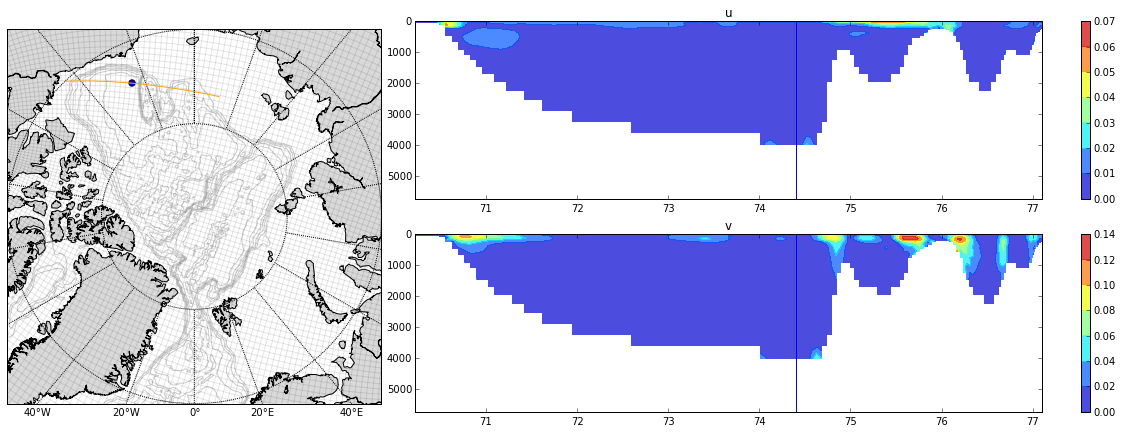

In [235]:
u,v,w=vel_ver(n=0,a=714,aloc='1')
fig = plt.figure(figsize=(25,7))
gs = gridspec.GridSpec(2, 7)
ax = fig.add_subplot(gs[:,0:2])


m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

X, Y = m(nav_lon, nav_lat)
cs=m.contour(X,Y,bathy0,colors='k',alpha=0.2)
m.plot(X[::5,::5], Y[::5,::5],X[::5,::5].T, Y[::5,::5].T,color='k',alpha=0.1)
m.plot(X[714,150:300],Y[714,150:300],color='orange')
m.scatter(X[714,216],Y[714,216],s=40)

ax = fig.add_subplot(gs[0,2:-1])
#plt.quiver(u[:,:], w[:,:],scale=5,color='black',alpha=0.2)
plt.contourf(nav_lat[712,150:300],depth(0),(u[:,150:300]**2+w[:,150:300]**2)**0.5,alpha=0.7)
plt.colorbar()
plt.axvline(x=nav_lat[712,216])
plt.title('u')
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[1,2:-1])
#plt.quiver(v[:,:], w[:,:],scale=5,color='black',alpha=0.2)
plt.contourf(nav_lat[712,150:300],depth(0),(v[:,150:300]**2+w[:,150:300]**2)**0.5,alpha=0.7)
plt.colorbar()
plt.axvline(x=nav_lat[712,216])
plt.title('v')
plt.gca().invert_yaxis()

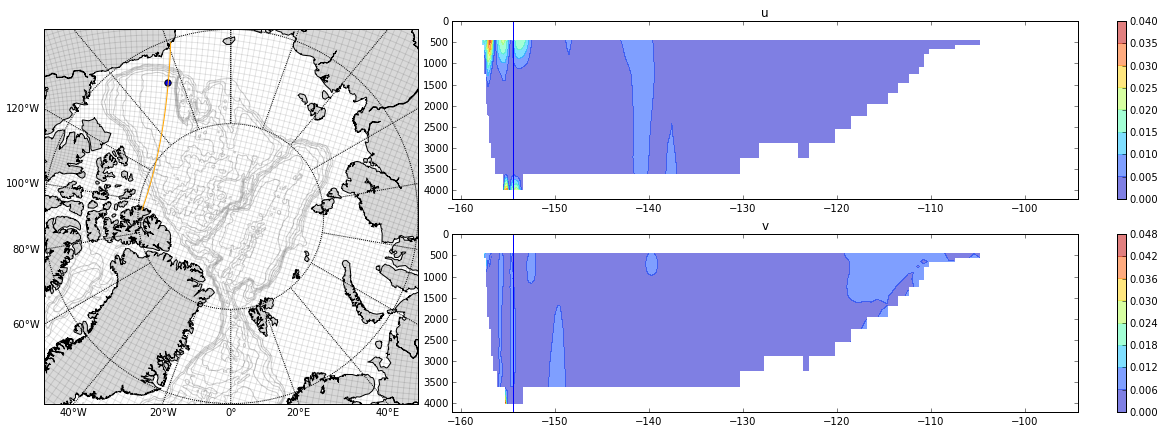

In [278]:
u,v,w=vel_ver(n=0,a=216,aloc='2')
fig = plt.figure(figsize=(25,7))
gs = gridspec.GridSpec(2, 7)
ax = fig.add_subplot(gs[:,0:2])


m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1, 0, 0, 1])

X, Y = m(nav_lon, nav_lat)

cs=m.contour(X,Y,bathy0,colors='k',alpha=0.2)
m.plot(X[::5,::5], Y[::5,::5],X[::5,::5].T, Y[::5,::5].T,color='k',alpha=0.1)
m.plot(X[580:750,216],Y[580:750,216],color='orange')
m.scatter(X[714,216],Y[714,216],s=40)

ax = fig.add_subplot(gs[0,2:-1])
plt.contourf(nav_lon[580:750,216],depth(0)[30:-1],(u[30:-1,580:750]**2+w[30:-1,580:750]**2)**0.5,alpha=0.5)
plt.colorbar()
plt.axvline(x=nav_lon[712,216])
plt.ylim([0,4200])
plt.title('u')
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[1,2:-1])
plt.contourf(nav_lon[580:750,216],depth(0)[30:-1],(v[30:-1,580:750]**2+w[30:-1,580:750]**2)**0.5,alpha=0.5)
plt.colorbar()
plt.axvline(x=nav_lon[712,216])
plt.ylim([0,4200])
plt.title('v')
plt.gca().invert_yaxis()

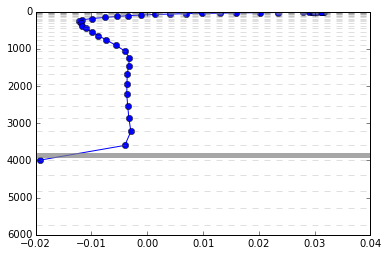

In [54]:
U=nc.Dataset(U_filename[0])
U=U.variables['vozocrtx'][0,:,712,216]
U=np.ma.masked_where(abs(U)<= 0, U)
U=np.ma.masked_where(np.isnan(U),U)
plt.plot(U,depth(0),'o-')
for k in range (len(depth(0))):
    plt.axhline(depth(0)[k],c="grey",linestyle='--',linewidth=0.5,alpha=0.5)
plt.axhline(bathy[712,216],c="grey",linewidth=5,alpha=0.7)
plt.gca().invert_yaxis()

The value at point ([712,216]) goes down to 4000 metre. (So do the points around it.)

**Diss Pa and Th output at the blue point in Canada Basin**

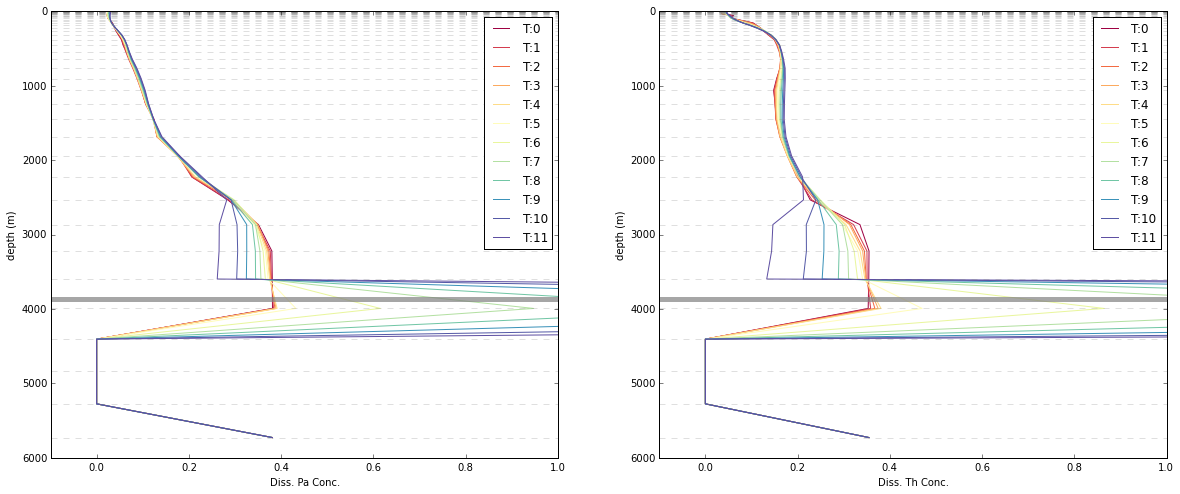

In [43]:
from IPython.display import Image
Image(filename='/home/xiaoxiny/Desktop/index1styr.png',width='100%') 

# 2. Temp & Salinity profile at Canada Basin

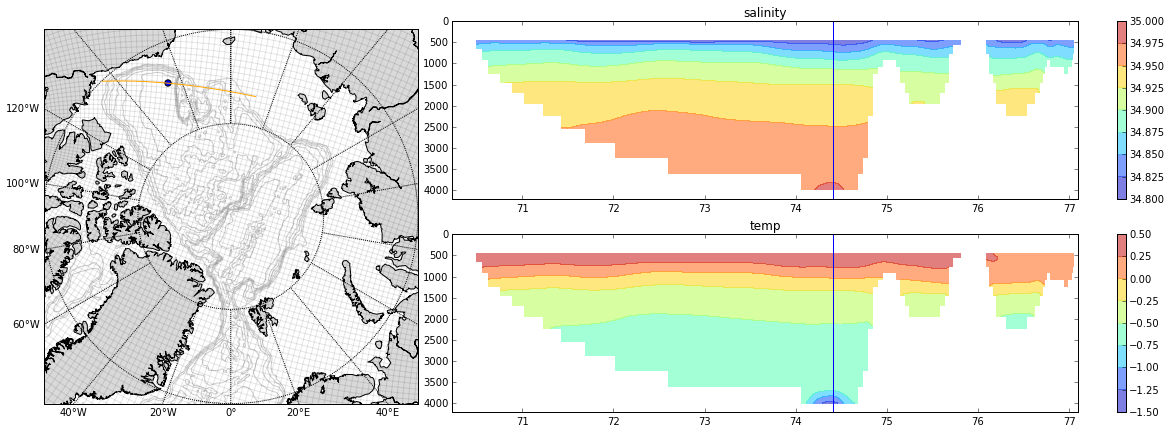

In [279]:
S,T=ST_ver(n=0,a=712,aloc='1')
fig = plt.figure(figsize=(25,7))
gs = gridspec.GridSpec(2, 7)
ax = fig.add_subplot(gs[:,0:2])


m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1, 0, 0, 1])

X, Y = m(nav_lon, nav_lat)
cs=m.contour(X,Y,bathy0,colors='k',alpha=0.2)
m.plot(X[::5,::5], Y[::5,::5],X[::5,::5].T, Y[::5,::5].T,color='k',alpha=0.1)
m.plot(X[714,150:300],Y[714,150:300],color='orange')
m.scatter(X[714,216],Y[714,216],s=40)


ax = fig.add_subplot(gs[0,2:-1])
plt.contourf(nav_lat[712,150:300],depth(0)[30:-1],S[30:-1,150:300],alpha=0.5)
plt.colorbar()
plt.axvline(x=nav_lat[712,216])
plt.title('salinity')
plt.ylim([0,4200])
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[1,2:-1])
plt.contourf(nav_lat[712,150:300],depth(0)[30:-1],T[30:-1,150:300],alpha=0.5)
plt.colorbar()
plt.axvline(x=nav_lat[712,216])
plt.title('temp')
plt.ylim([0,4200])
plt.gca().invert_yaxis()


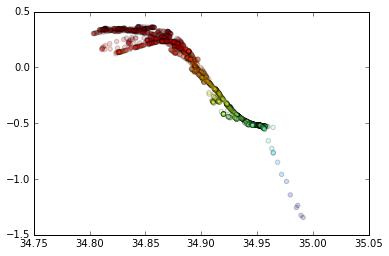

In [280]:
t=T[30:-1,150:300]
plt.scatter(S[30:-1,150:300],T[30:-1,150:300],c=t,alpha=0.2)

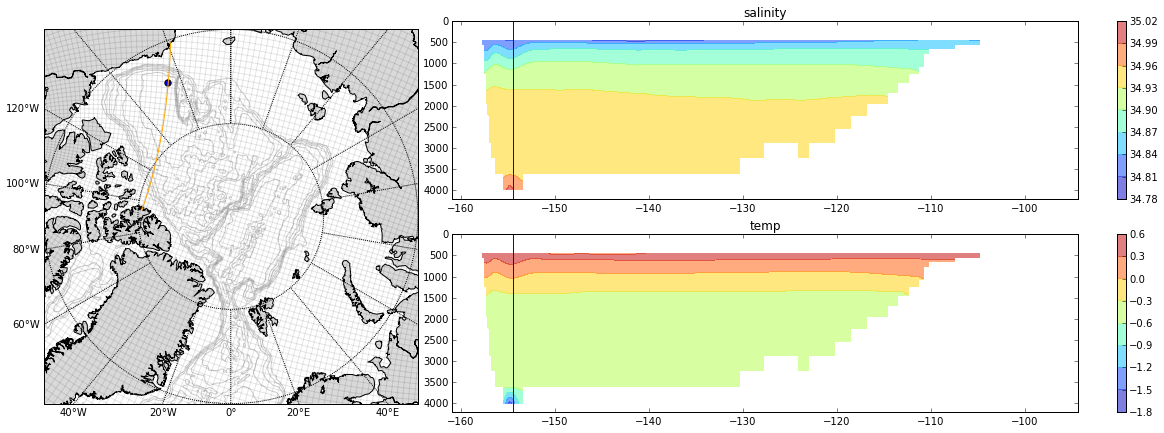

In [281]:
S,T=ST_ver(n=0,a=216,aloc='2')
fig = plt.figure(figsize=(25,7))
gs = gridspec.GridSpec(2, 7)
ax = fig.add_subplot(gs[:,0:2])


m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1, 0, 0, 1])

X, Y = m(nav_lon, nav_lat)

cs=m.contour(X,Y,bathy0,colors='k',alpha=0.2)
m.plot(X[::5,::5], Y[::5,::5],X[::5,::5].T, Y[::5,::5].T,color='k',alpha=0.1)
m.plot(X[580:750,216],Y[580:750,216],color='orange')
m.scatter(X[714,216],Y[714,216],s=40)

ax = fig.add_subplot(gs[0,2:-1])
plt.contourf(nav_lon[580:750,216],depth(0)[30:-1],S[30:-1,580:750],alpha=0.5)
plt.colorbar()
plt.axvline(x=nav_lon[712,216])
plt.ylim([0,4200])
plt.title('salinity')
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[1,2:-1])
plt.contourf(nav_lon[580:750,216],depth(0)[30:-1],T[30:-1,580:750],alpha=0.5)
plt.colorbar()
plt.axvline(x=nav_lon[712,216])
plt.ylim([0,4200])
plt.title('temp')
plt.gca().invert_yaxis()

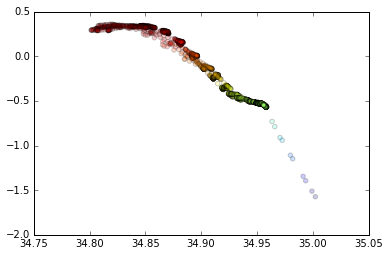

In [282]:
t=T[30:-1,580:750]
plt.scatter(S[30:-1,580:750],T[30:-1,580:750],c=t,alpha=0.2)

# 3. Vertical profile at Nansen Basin

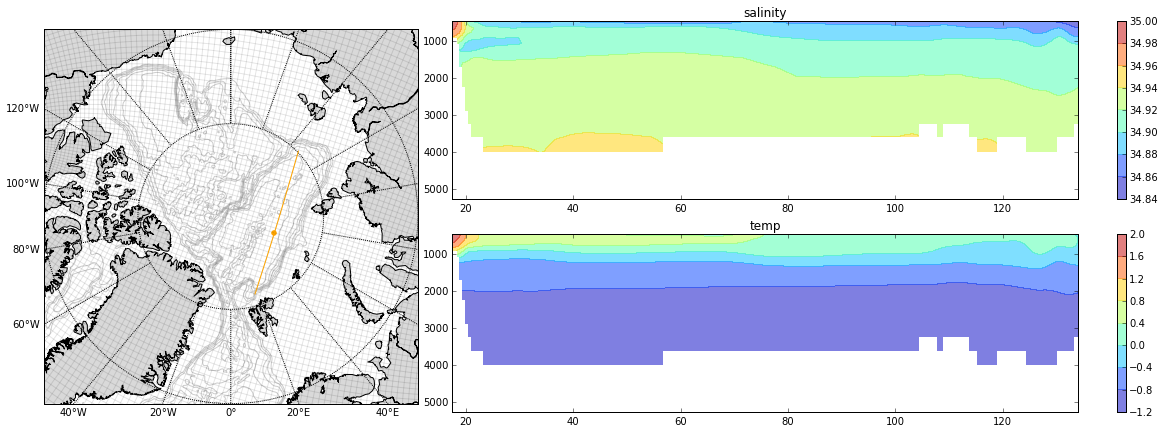

In [44]:
S,T=ST_ver(n=0,a=350,aloc='2')
fig = plt.figure(figsize=(25,7))
gs = gridspec.GridSpec(2, 7)
ax = fig.add_subplot(gs[:,0:2])

m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1, 0, 0, 1])
X, Y = m(nav_lon, nav_lat)
cs=m.contour(X,Y,bathy0,colors='k',alpha=0.2)
m.plot(X[::5,::5], Y[::5,::5],X[::5,::5].T, Y[::5,::5].T,color='k',alpha=0.1)
m.plot(X[540:680,350],Y[540:680,350],color='orange')
m.scatter(X[600,350],Y[600,350],color='orange')

ax = fig.add_subplot(gs[0,2:-1])
plt.contourf(nav_lon[540:680,350],depth(0)[30:-1],S[30:-1,540:680],alpha=0.5)
plt.colorbar()
plt.title('salinity')
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[1,2:-1])
plt.contourf(nav_lon[540:680,350],depth(0)[30:-1],T[30:-1,540:680],alpha=0.5)
plt.colorbar()
plt.title('temp')
plt.gca().invert_yaxis()

**Diss Pa and Th output at the orange point in Nansen Basin**

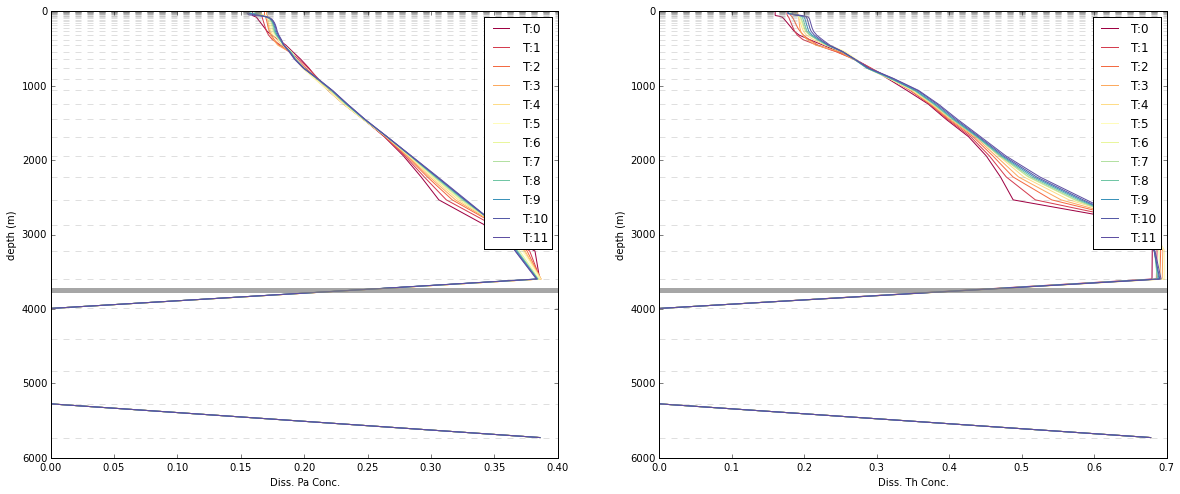

In [46]:
from IPython.display import Image
Image(filename='/home/xiaoxiny/Desktop/index_NB.png',width='100%') 

# 4. Vertical profile at Amundsen Basin 

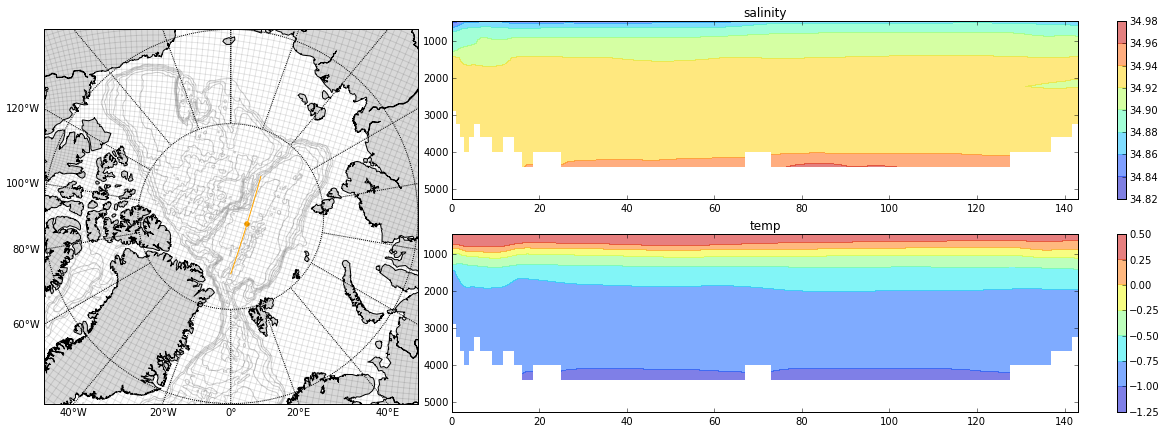

In [40]:
S,T=ST_ver(n=0,a=322,aloc='2')
fig = plt.figure(figsize=(25,7))
gs = gridspec.GridSpec(2, 7)
ax = fig.add_subplot(gs[:,0:2])

m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1, 0, 0, 1])
X, Y = m(nav_lon, nav_lat)
cs=m.contour(X,Y,bathy0,colors='k',alpha=0.2)
m.plot(X[::5,::5], Y[::5,::5],X[::5,::5].T, Y[::5,::5].T,color='k',alpha=0.1)
m.plot(X[550:650,322],Y[550:650,322],color='orange')
m.scatter(X[600,322],Y[600,322],color='orange')

ax = fig.add_subplot(gs[0,2:-1])
plt.contourf(nav_lon[550:650,322],depth(0)[30:-1],S[30:-1,550:650],alpha=0.5)
plt.colorbar()
plt.title('salinity')
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[1,2:-1])
plt.contourf(nav_lon[550:650,322],depth(0)[30:-1],T[30:-1,550:650],alpha=0.5)
plt.colorbar()
plt.title('temp')
plt.gca().invert_yaxis()

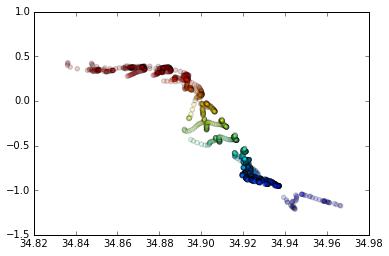

In [39]:
t=T[30:-1,550:650]
plt.scatter(S[30:-1,550:650],T[30:-1,550:650],c=t,alpha=0.2)

** Diss Pa and Th output at the orange point in Amunden Basin**

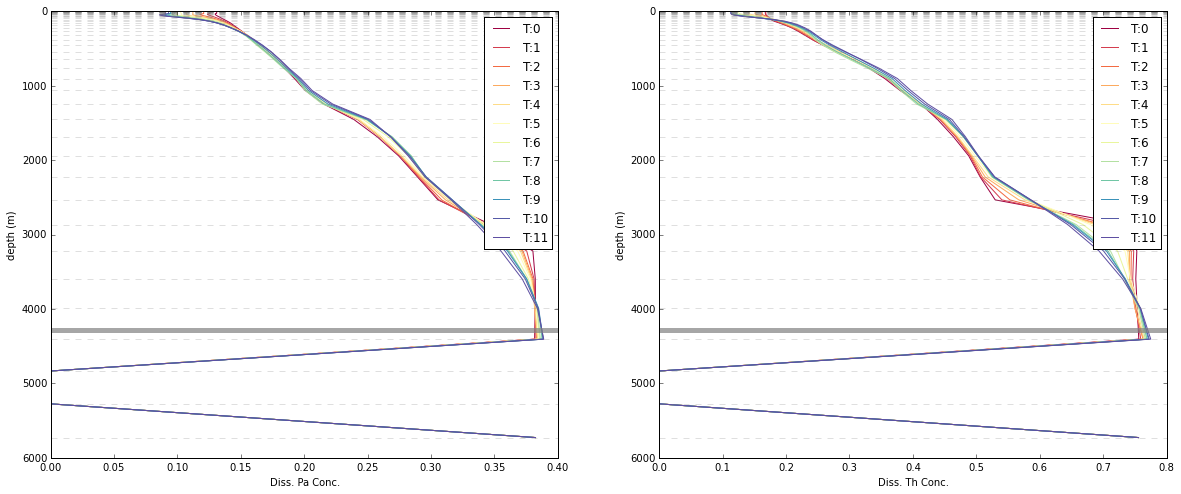

In [41]:
from IPython.display import Image
Image(filename='/home/xiaoxiny/Desktop/index.png',width='100%') 